In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn import tree


In [2]:
store=pd.read_csv("C:/Users/Singh/Downloads/DS3_C6_S1_Regression_StoreSales_Data_Project.csv")

In [3]:
store.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [4]:
store.shape

(14204, 12)

In [5]:
store.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
store.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
import seaborn as sns

<AxesSubplot:>

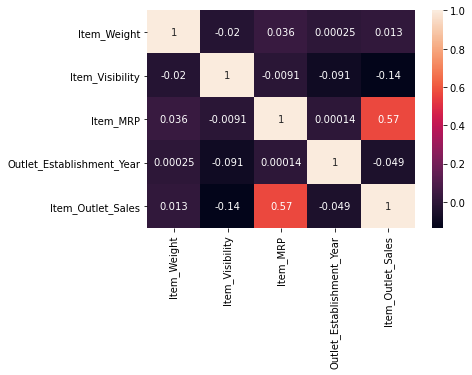

In [8]:
sns.heatmap(store.corr(),annot=True)

In [9]:
store.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
item=store.groupby(['Item_Type'])['Item_Outlet_Sales'].sum()
item1=item.sort_values(ascending=True)
#sns.barplot(data=item, y='Item_Type', x='Item_Outlet_Sales')

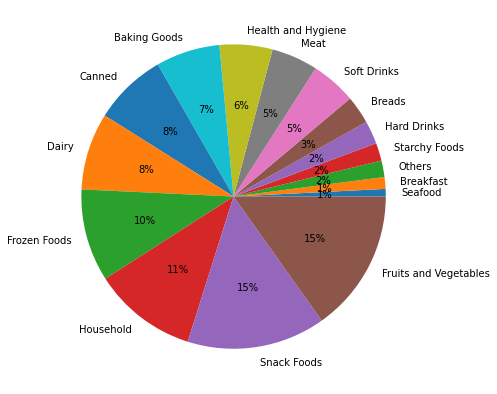

In [11]:
fig = plt.figure(figsize =(10, 7))
plt.pie(item1, labels = item1.index,autopct = '%.f%%')
 
# show plot
plt.show()

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Location_Type'>

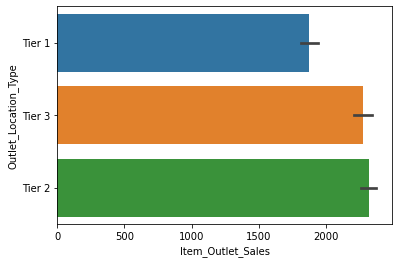

In [12]:
sns.barplot(data=store, y='Outlet_Location_Type', x='Item_Outlet_Sales')

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

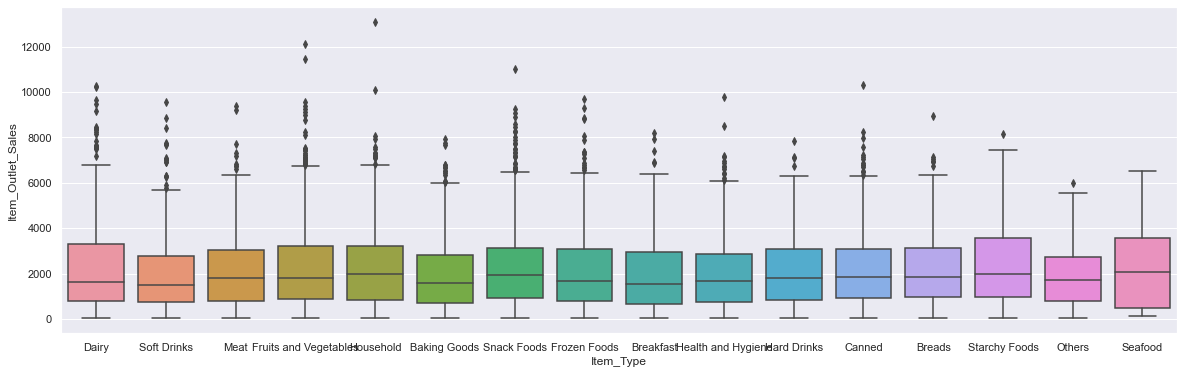

In [13]:
sns.set(rc={"figure.figsize":(20, 6)})
sns.boxplot(data=store, x='Item_Type', y='Item_Outlet_Sales')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

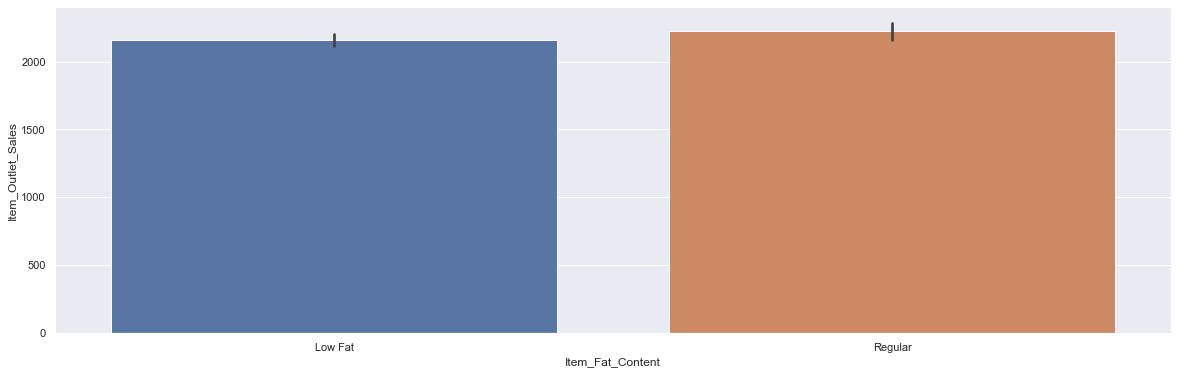

In [14]:
sns.barplot(data=store, x="Item_Fat_Content", y="Item_Outlet_Sales")

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

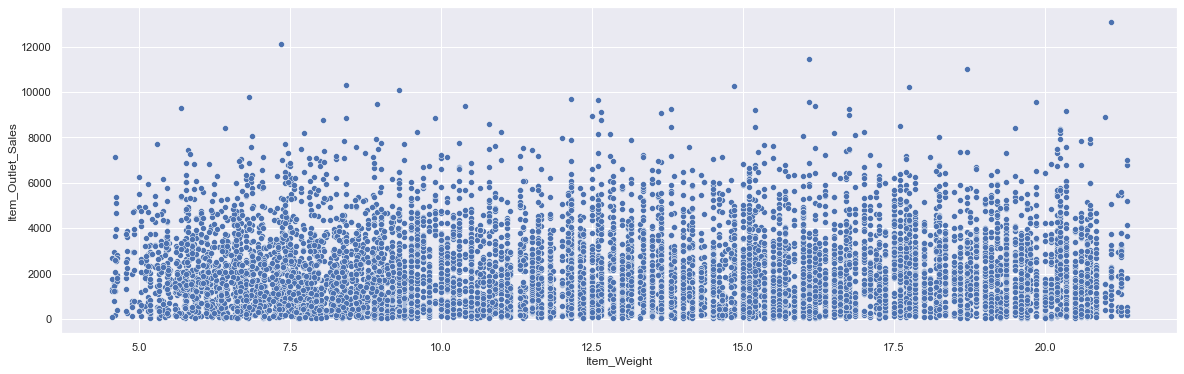

In [15]:
sns.scatterplot(data=store, x="Item_Weight", y="Item_Outlet_Sales")

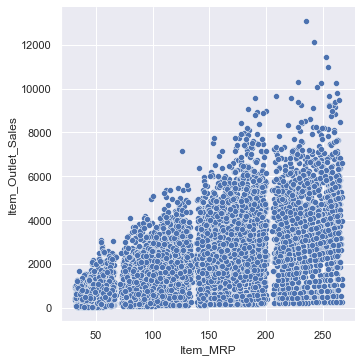

In [16]:
sns.relplot(data=store, x="Item_MRP", y="Item_Outlet_Sales")

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Location_Type'>

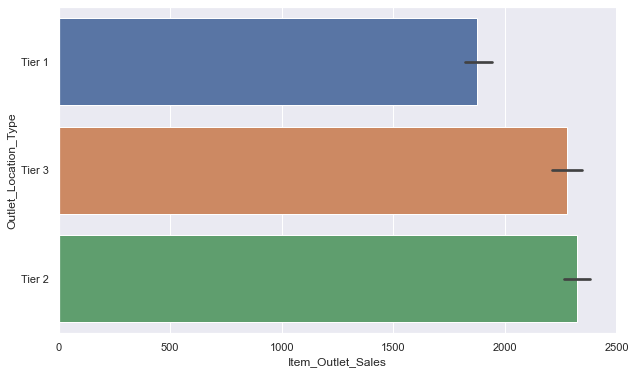

In [17]:
sns.set(rc={"figure.figsize":(10, 6)})
sns.barplot(data=store, y='Outlet_Location_Type', x='Item_Outlet_Sales')

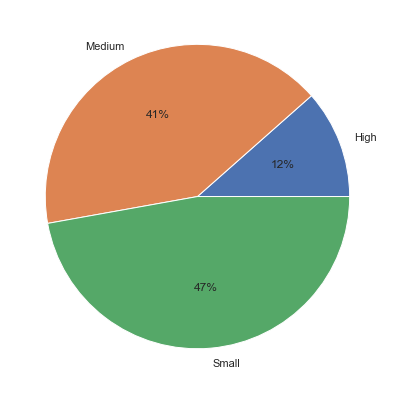

In [18]:
size=store.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum()
fig = plt.figure(figsize =(10, 7))
plt.pie(size, labels = size.index,autopct = '%.f%%')
 
# show plot
plt.show()

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

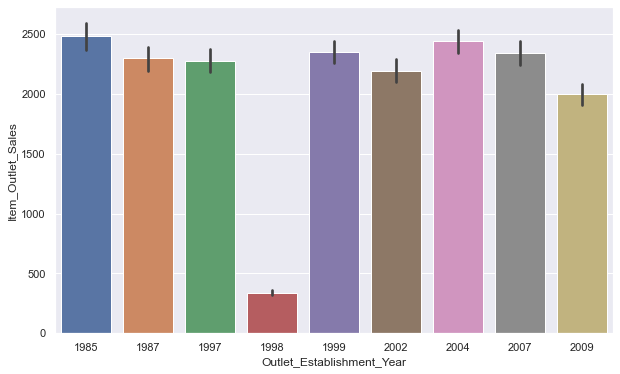

In [19]:
sns.barplot(data=store,x='Outlet_Establishment_Year',y='Item_Outlet_Sales')

In [20]:
store=store.dropna()

In [21]:
store.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

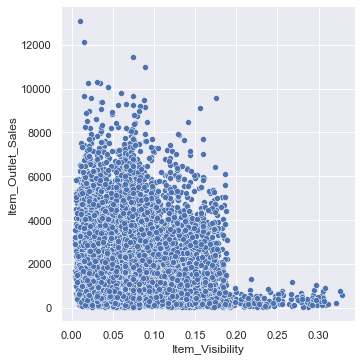

In [22]:
sns.relplot(data=store, x="Item_Visibility", y="Item_Outlet_Sales")

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Type'>

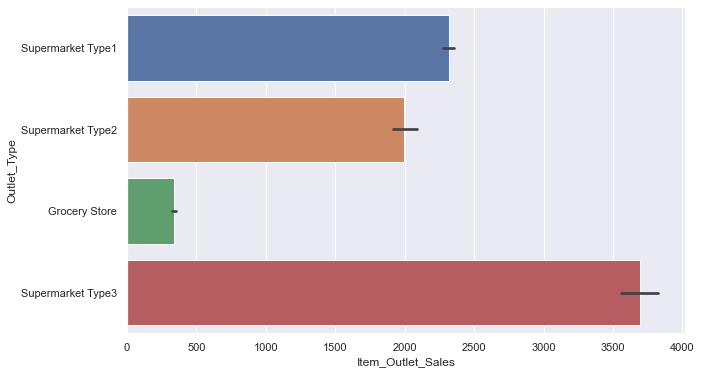

In [23]:
sns.barplot(data=store, y='Outlet_Type', x='Item_Outlet_Sales')

In [24]:
store.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [25]:
categ=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in categ:
    store[i]=store[i].astype('category')


In [26]:
label_encoder = preprocessing.LabelEncoder()
for i in categ:
    store[i]= label_encoder.fit_transform(store[i])


In [27]:
store.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

<AxesSubplot:>

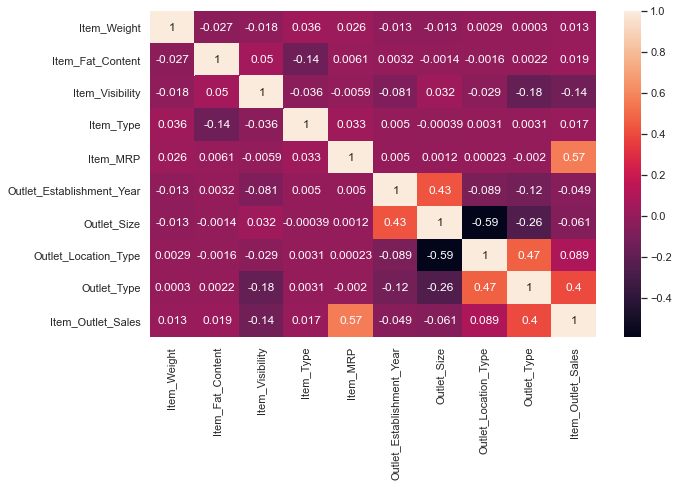

In [28]:
sns.heatmap(store.corr(),annot=True)

In [29]:
store

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.920,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.500,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.200,1,0.074402,6,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.930,0,0.064299,9,53.8614,OUT013,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,13,214.5218,OUT013,1987,0,2,1,2778.3834
8519,FDS36,8.380,1,0.046982,0,108.1570,OUT045,2002,2,1,1,549.2850
8520,NCJ29,10.600,0,0.035186,8,85.1224,OUT035,2004,2,1,1,1193.1136
8521,FDN46,7.210,1,0.145221,13,103.1332,OUT018,2009,1,2,2,1845.5976


In [30]:
store.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [31]:
store=store.drop(['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],axis=1)

In [32]:
store.dtypes

Item_Weight             float64
Item_Fat_Content          int32
Item_Visibility         float64
Item_Type                 int32
Item_MRP                float64
Outlet_Size               int32
Outlet_Location_Type      int32
Outlet_Type               int32
Item_Outlet_Sales       float64
dtype: object

In [33]:
store.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

In [34]:
store

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1,0,1,2097.2700
3,19.200,1,0.074402,6,182.0950,1,2,0,732.3800
4,8.930,0,0.064299,9,53.8614,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,1,2,2,1845.5976


In [35]:
from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()  
scaled= sc.fit_transform(store)  

In [36]:
scaled1=pd.DataFrame(scaled,columns=store.columns)

X=scaled1.drop(['Item_Outlet_Sales'],axis=1)
Y=scaled1['Item_Outlet_Sales']

In [37]:
X=scaled1[['Item_MRP','Item_Visibility','Outlet_Type','Outlet_Size']]
Y=scaled1['Item_Outlet_Sales']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=45)

### Linear Regression:-

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import r2_score
from numpy import mean
from numpy import std

In [40]:
cv_score, score,rmse,names = list(), list(),list(), list()
model = LinearRegression()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')

mean(-n_scores)*100

51.062818706936085

In [41]:
model.fit(X_train,Y_train)
lin_score=model.score(X_train, Y_train)
y_pred_linear = model.predict(X_test)
RMSE = mean_squared_error(Y_test, y_pred_linear, squared=False)
lin_test=r2_score(Y_test, y_pred_linear)
print("RMSE: ",RMSE)
print('R2 score:',lin_score)
print('Test Score:',lin_test)

RMSE:  0.7145259215625864
R2 score: 0.4929111716877095
Test Score: 0.48241518269268113


In [42]:
y_pred_linear

array([ 1.49095657, -0.60330871, -0.05984149, ...,  0.91225459,
       -0.69046452,  1.01291979])

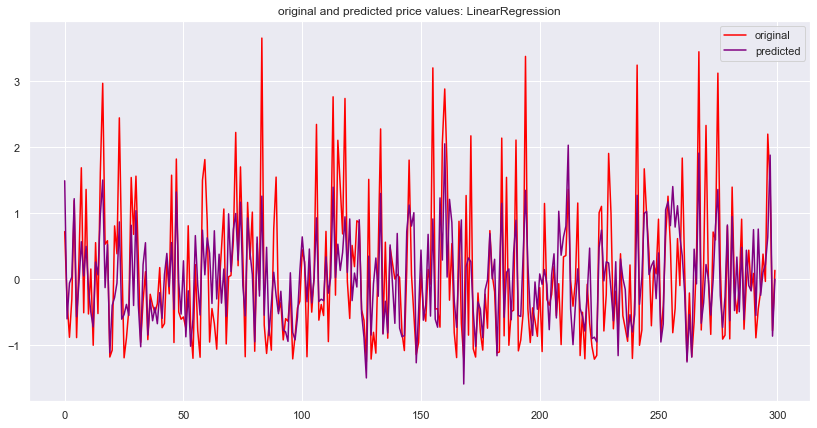

In [43]:
x_ax = range(len(Y_test[0:300]))
plt.figure(figsize=(14,7))
plt.plot(x_ax, Y_test[0:300], color="red", label="original")
plt.plot(x_ax, y_pred_linear[0:300], color="purple", label="predicted")
plt.legend()
plt.title("original and predicted price values: LinearRegression")
plt.show()

<AxesSubplot:xlabel='Item_Outlet_Sales'>

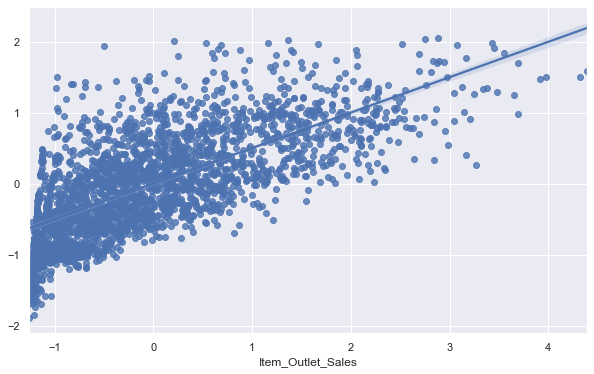

In [44]:
sns.regplot(x=Y_test,y=y_pred_linear)

In [45]:
cv_score.append(mean(-n_scores)*100)
score.append(lin_score)
rmse.append(RMSE)
names.append('Linear Reg')

### Random Forest Regressor:-

In [46]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(max_depth=5)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model1, X, Y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')

mean(-n_scores)*100

40.18241040053338

In [47]:
model1.fit(X_train,Y_train)
rad_score=model1.score(X_train, Y_train)
y_pred_random = model1.predict(X_test)
RMSE = mean_squared_error(Y_test, y_pred_random, squared=False)
random_test=r2_score(Y_test, y_pred_random)
print("RMSE: ",RMSE)
print('SCORE:',rad_score)
print('Test Score:',random_test)

RMSE:  0.6378875699664251
SCORE: 0.6152038400263391
Test Score: 0.5874906186256037


In [48]:
cv_score.append(mean(-n_scores)*100)
score.append(rad_score)
rmse.append(RMSE)
names.append('Random Forest')

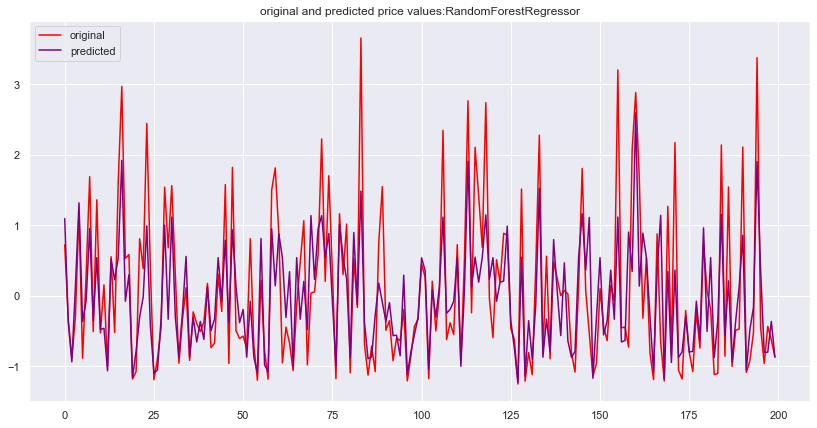

In [49]:
x_ax = range(len(Y_test[0:200]))
plt.figure(figsize=(14,7))
plt.plot(x_ax, Y_test[0:200], color="red", label="original")
plt.plot(x_ax, y_pred_random[0:200], color="purple", label="predicted")
plt.legend()
plt.title("original and predicted price values:RandomForestRegressor")
plt.show()

<AxesSubplot:xlabel='Item_Outlet_Sales'>

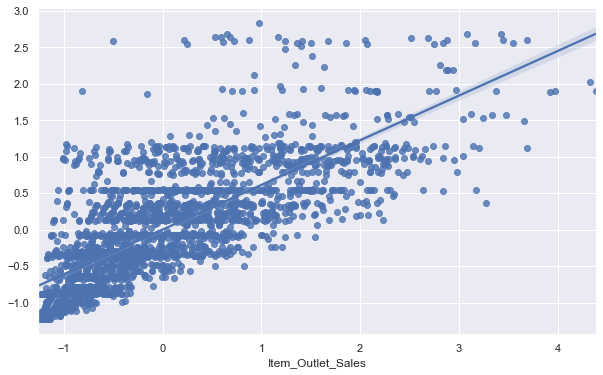

In [50]:
sns.regplot(x=Y_test,y=y_pred_random)

### Adaboost Regressor:-

In [51]:
from sklearn.ensemble import AdaBoostRegressor

In [52]:
model2 = AdaBoostRegressor()

cv = RepeatedKFold(n_splits=6, n_repeats=3, random_state=1)
n_scores = cross_val_score(model2, X, Y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')

mean(-n_scores)*100

50.799959231546886

In [53]:
model2.fit(X_train,Y_train)
ada_score=model2.score(X_train, Y_train)
y_pred_adaboost = model2.predict(X_test)
RMSE = mean_squared_error(Y_test, y_pred_adaboost, squared=False)
ada_test=r2_score(Y_test, y_pred_adaboost)
print("RMSE: ",RMSE)
print('SCORE:',ada_score)
print('Test Score:',ada_test)

RMSE:  0.6875680845099941
SCORE: 0.5505245804910422
Test Score: 0.520733614529115


In [54]:
cv_score.append(mean(-n_scores)*100)
score.append(ada_score)
rmse.append(RMSE)
names.append('Adaboost')

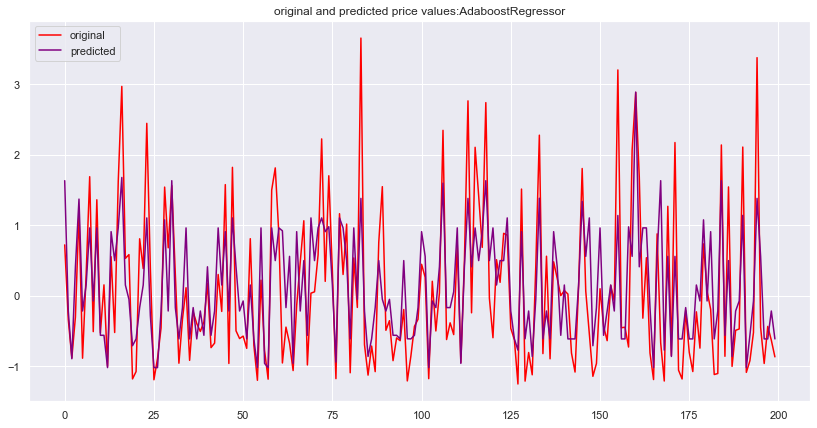

In [55]:
x_ax = range(len(Y_test[0:200]))
plt.figure(figsize=(14,7))
plt.plot(x_ax, Y_test[0:200], color="red", label="original")
plt.plot(x_ax, y_pred_adaboost[0:200], color="purple", label="predicted")
plt.legend()
plt.title("original and predicted price values:AdaboostRegressor")
plt.show()

<AxesSubplot:xlabel='Item_Outlet_Sales'>

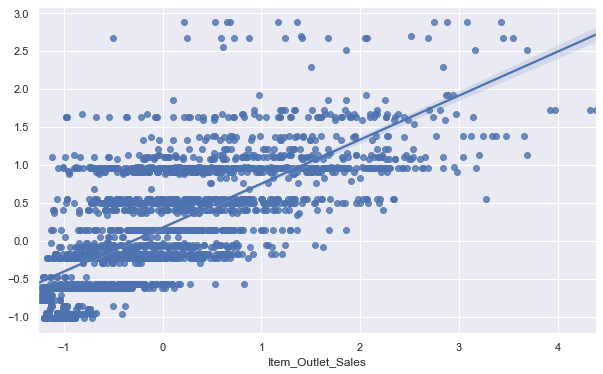

In [56]:
sns.regplot(x=Y_test,y=y_pred_adaboost)

C:\Users\Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


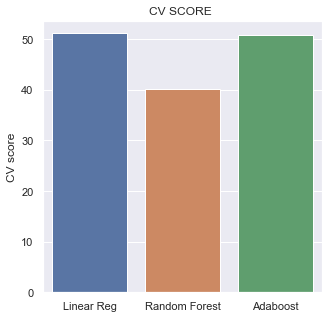

In [57]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(names,cv_score);
plt.ylabel('CV score')
plt.title('CV SCORE ');

C:\Users\Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


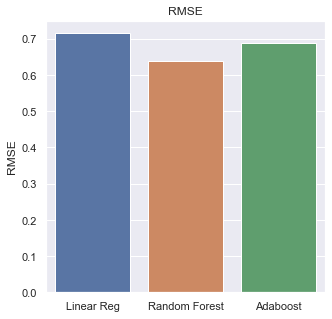

In [58]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(names,rmse);
plt.ylabel('RMSE')
plt.title('RMSE');

C:\Users\Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


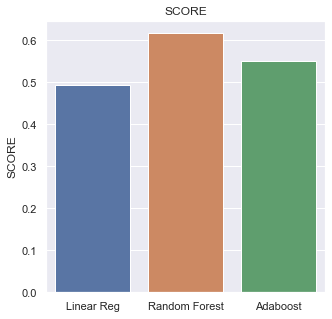

In [59]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(names,score);
plt.ylabel('SCORE')
plt.title('SCORE');

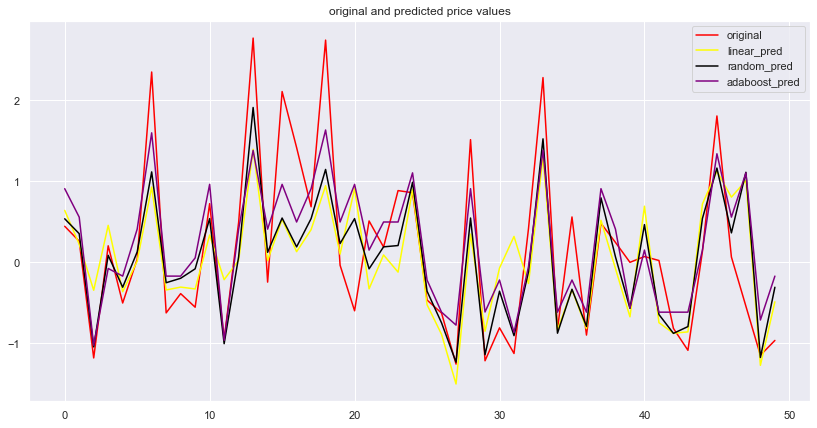

In [60]:
x_ax = range(len(Y_test[100:150]))
plt.figure(figsize=(14,7))
plt.plot(x_ax, Y_test[100:150], color="red", label="original")
plt.plot(x_ax, y_pred_linear[100:150], color="yellow", label="linear_pred")
plt.plot(x_ax, y_pred_random[100:150], color="black", label="random_pred")
plt.plot(x_ax, y_pred_adaboost[100:150], color="purple", label="adaboost_pred")
plt.legend()
plt.title("original and predicted price values")
plt.show()